In [1]:
from numpy import sin, linspace, loadtxt, array, zeros, arange, copy, empty
from math import pi, floor, exp, cos, sin, sqrt
from pylab import legend, xlabel, ylabel, title, imshow, plot, jet, gray, show, axis
from scipy import signal
import matplotlib
%precision %g
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['savefig.dpi'] = 120
matplotlib.rcParams['figure.dpi'] = 120
from time import time

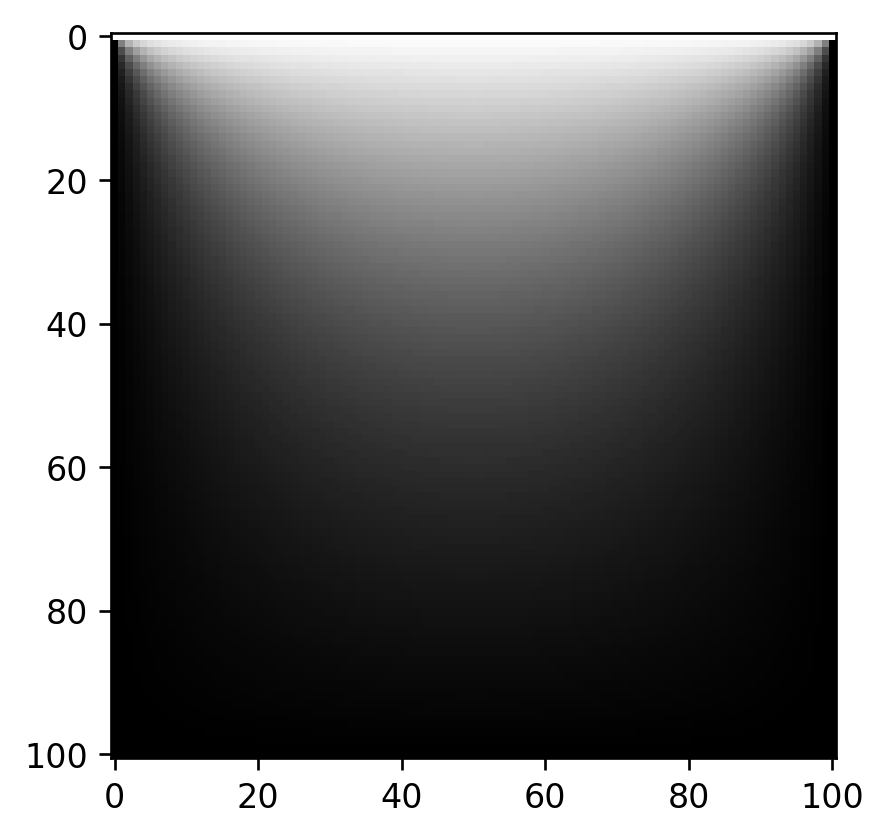

Time taken 192.04335021972656 seconds


In [2]:
# using the equation 9.9
from numpy import empty,zeros,max
from pylab import imshow,gray,show

# Constants
M = 100         # Grid squares on a side
V = 1.0         # Voltage at top wall
target = 1e-6   # Target accuracy

# Create arrays to hold potential values
phi = zeros([M+1,M+1],float)
phi[0,:] = V
phiprime = empty([M+1,M+1],float)

# Main loop
delta = 1.0
timestart = time()
while delta>target:

    # Calculate new values of the potential
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                phiprime[i,j] = phi[i,j]
            else:
                phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] \
                                 + phi[i,j+1] + phi[i,j-1])/4

    # Calculate maximum difference from old values
    delta = max(abs(phi-phiprime))

    # Swap the two arrays around
    phi,phiprime = phiprime,phi

timeend = time()
totaltime = timeend - timestart 
# Make a plot
imshow(phi)
gray()
show()
print("Time taken", totaltime, "seconds")

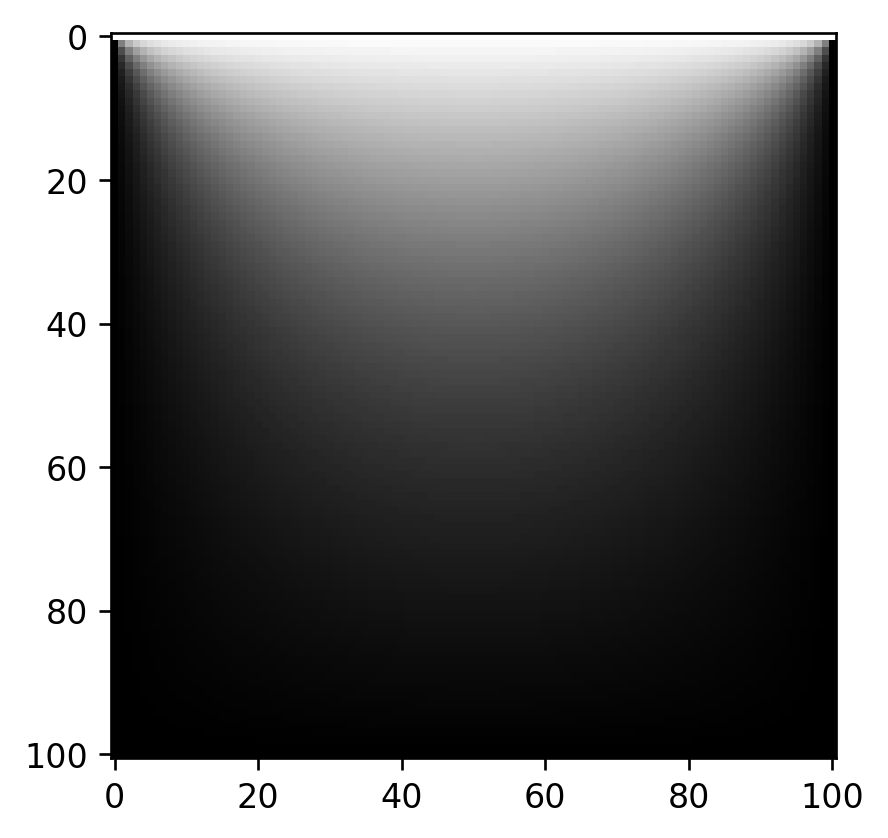

Time taken 406.01154804229736 seconds


In [3]:
# Constants
M = 100         # Grid squares on a side
V = 10         # Voltage at top wall
target = 1e-6   # Target accuracy

# Create arrays to hold potential values
phi = zeros([M+1,M+1],float)
phi[0,:] = V
phiprime = empty([M+1,M+1],float)

# Main loop
delta = 1.0
timestart = time()
while delta>target:

    # Calculate new values of the potential
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                phiprime[i,j] = phi[i,j]
            else:
                phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] \
                                 + phi[i,j+1] + phi[i,j-1])/4

    # Calculate maximum difference from old values
    delta = max(abs(phi-phiprime))

    # Swap the two arrays around
    phi,phiprime = phiprime,phi

timeend = time()
totaltime = timeend - timestart 
# Make a plot
imshow(phi)
gray()
show()
print("Time taken", totaltime, "seconds")

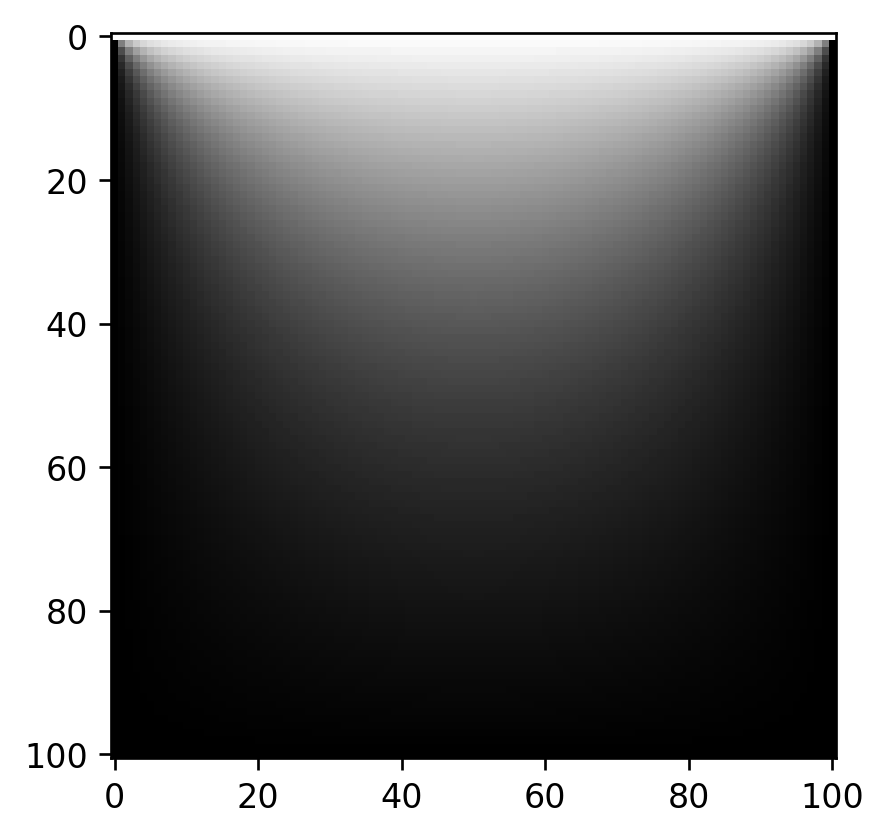

Time taken 399.714154958725 seconds


In [4]:
# Constants
M = 100         # Grid squares on a side
V = 20         # Voltage at top wall
target = 1e-6   # Target accuracy

# Create arrays to hold potential values
phi = zeros([M+1,M+1],float)
phi[0,:] = V
phiprime = empty([M+1,M+1],float)

# Main loop
delta = 1.0
timestart = time()
while delta>target:

    # Calculate new values of the potential
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                phiprime[i,j] = phi[i,j]
            else:
                phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] \
                                 + phi[i,j+1] + phi[i,j-1])/4

    # Calculate maximum difference from old values
    delta = max(abs(phi-phiprime))

    # Swap the two arrays around
    phi,phiprime = phiprime,phi

timeend = time()
totaltime = timeend - timestart 
# Make a plot
imshow(phi)
gray()
show()
print("Time taken", totaltime, "seconds")

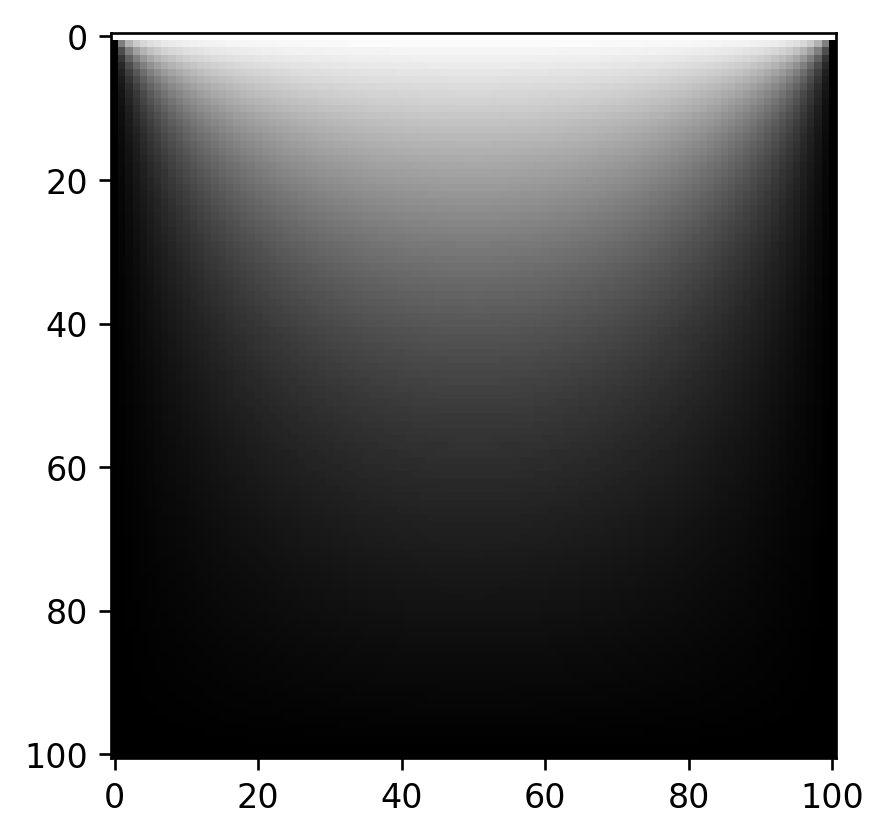

Time taken 11.937444925308228 seconds


In [6]:
# Using the equation 9.15
# Constants
V = 1.0  # volts
a = 0.01  # grid spacing in meters
N = 100  # number of grid points
delta = 10 ** -6  # volts
timestart = time()
w = 0.9

def larger(a, b):
    if a >= b:
        return a
    else:
        return b


# Solve poisson's equation using Gauss-Seidel relaxation method
max_diff = 2 * delta
# initialize array
phi = zeros([N + 1, N + 1], float)
phi[0,:] = V
while max_diff > delta:
    #  reset max difference after each complete update of grid
    max_diff = 0.0
    for i in range(N + 1):
        for j in range(N + 1):
            if not i == 0 and not j == 0 and not i == N and not j == N:
                old_phi = phi[i,j]
                new_phi = (1 + w) * (phi[i + 1, j] + phi[i - 1, j] + phi[i, j + 1] + phi[i, j - 1]) / 4 \
                          - w * old_phi
                phi[i, j] = new_phi

                # note the largest change in phi in this update of the grid
                max_diff = larger(max_diff, abs(new_phi - old_phi))
    # print("max_diff = ", max_diff)

timeend = time()
totaltime = timeend - timestart 
imshow(phi)
gray()
show()
print("Time taken", totaltime, "seconds")

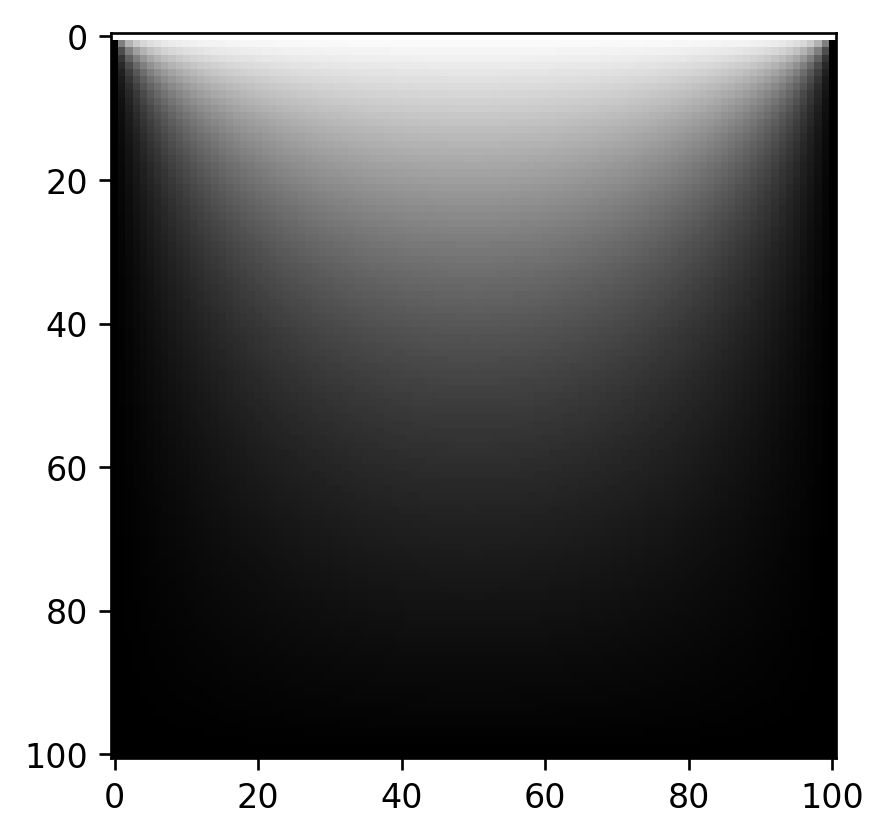

Time taken 15.418963432312012 seconds


In [7]:
# Constants
V = 10  # volts
a = 0.01  # grid spacing in meters
N = 100  # number of grid points
delta = 10 ** -6  # volts
timestart = time()
w = 0.9

def larger(a, b):
    if a >= b:
        return a
    else:
        return b


# Solve poisson's equation using Gauss-Seidel relaxation method
max_diff = 2 * delta
# initialize array
phi = zeros([N + 1, N + 1], float)
phi[0,:] = V
while max_diff > delta:
    #  reset max difference after each complete update of grid
    max_diff = 0.0
    for i in range(N + 1):
        for j in range(N + 1):
            if not i == 0 and not j == 0 and not i == N and not j == N:
                old_phi = phi[i,j]
                new_phi = (1 + w) * (phi[i + 1, j] + phi[i - 1, j] + phi[i, j + 1] + phi[i, j - 1]) / 4 \
                          - w * old_phi
                phi[i, j] = new_phi

                # note the largest change in phi in this update of the grid
                max_diff = larger(max_diff, abs(new_phi - old_phi))
    # print("max_diff = ", max_diff)

timeend = time()
totaltime = timeend - timestart 
imshow(phi)
gray()
show()
print("Time taken", totaltime, "seconds")

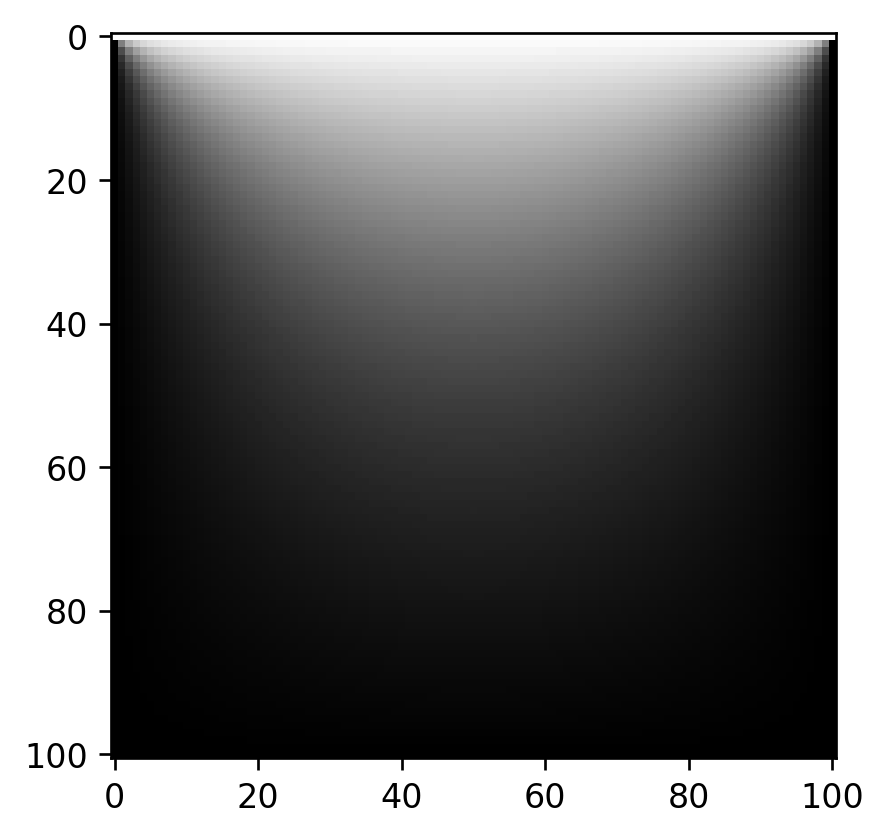

Time taken 21.746193408966064 seconds


In [8]:
# Constants
V = 20  # volts
a = 0.01  # grid spacing in meters
N = 100  # number of grid points
delta = 10 ** -6  # volts
timestart = time()
w = 0.9

def larger(a, b):
    if a >= b:
        return a
    else:
        return b


# Solve poisson's equation using Gauss-Seidel relaxation method
max_diff = 2 * delta
# initialize array
phi = zeros([N + 1, N + 1], float)
phi[0,:] = V
while max_diff > delta:
    #  reset max difference after each complete update of grid
    max_diff = 0.0
    for i in range(N + 1):
        for j in range(N + 1):
            if not i == 0 and not j == 0 and not i == N and not j == N:
                old_phi = phi[i,j]
                new_phi = (1 + w) * (phi[i + 1, j] + phi[i - 1, j] + phi[i, j + 1] + phi[i, j - 1]) / 4 \
                          - w * old_phi
                phi[i, j] = new_phi

                # note the largest change in phi in this update of the grid
                max_diff = larger(max_diff, abs(new_phi - old_phi))
    # print("max_diff = ", max_diff)

timeend = time()
totaltime = timeend - timestart 
imshow(phi)
gray()
show()
print("Time taken", totaltime, "seconds")